
###[Notícia do G1 São Paulo](http://g1.globo.com/sao-paulo/noticia/2015/03/cantareira-vai-145-todos-reservatorios-sobem.html)

![noticia](https://dl.dropboxusercontent.com/u/2057145/g1errou.png)

![
<!--![g1](reservatorios1403.jpg)-->


Fiquei desconfiado desse infografico. Quer dizer que já pagamos nossa "dívida" com o volume morto?

Vamos ver...

A sabesp disponibiliza dados para consulta [neste endereço](http://www2.sabesp.com.br/mananciais/DivulgacaoSiteSabesp.aspx), mas não faço idéia de como pegar os dados automaticamente... 

Ainda bem que uma [boa alma](https://github.com/rafaell-lycan) já fez uma [api](https://github.com/rafaell-lycan/sabesp-mananciais-api) que dá conta do serviço! Graças a ele pude escrever uma função bem meia boca pra capturar esses dados, o getData.

In [1]:
from sabesPy import getData
import pandas as pd

df = pd.DataFrame([getData('2014-03-14'), getData('2015-03-14')])

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns ## só pra deixar o matplotlib com o estilo bonitão do seaborn ;)
#sns.set_context("talk")
sns.set_context("talk")
sns.set_style("darkgrid", {"grid.linewidth": .5, "axes.facecolor": ".9"})
#pd.options.display.mpl_style = 'default' ## estilo ggplot

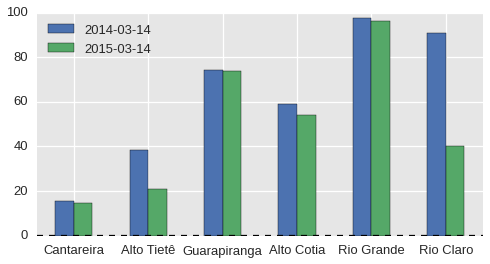

In [3]:
datasG1 = ['2014-03-14','2015-03-14']
df.ix[datasG1,:].T.plot(kind='bar', rot=0, figsize=(8,4))
plt.show()

OK. Tudo certo. Bate com os gráficos mostrados pelo G1, apenas está sendo mostrado de uma forma diferente. 

Maaas...

In [4]:
datas = ['2014-03-14',
         '2014-05-15', # pré-volume morto
         '2014-05-16', # estréia da "primeira reserva técnica", a.k.a. volume morto
         '2014-07-12',
         '2014-10-23',
         '2014-10-24', # "segunda reserva técnica" ou "VOLUME MORTO 2: ELECTRIC BOOGALOO"
         '2015-01-01', # feliz ano novo ?
         '2015-03-14']
import numpy as np
df = pd.DataFrame(pd.concat(map(getData, datas), axis=1))

In [5]:
df = df.T

In [6]:
df

,Cantareira,Alto Tietê,Guarapiranga,Alto Cotia,Rio Grande,Rio Claro
2014-03-14,15.5,38.5,74.4,59.1,97.6,90.6
2014-05-15,8.2,33.0,74.4,46.9,93.2,98.6
2014-05-16,26.7,32.8,74.1,46.7,92.8,98.3
2014-07-12,18.5,23.9,69.1,45.6,90.0,92.6
2014-10-23,3.0,8.2,41.9,30.2,71.2,49.7
2014-10-24,13.6,8.0,41.5,30.0,70.9,49.1
2015-01-01,7.2,12.1,40.6,31.4,71.9,32.5
2015-03-14,14.5,21.0,73.8,54.2,96.1,40.2


In [7]:
def plotSideBySide(dfTupl, cm=['Spectral', 'coolwarm'], titles=[None, None]):
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1,2, figsize=(17,5))

    for i, ax in enumerate(axes):
        dfTupl[i].ix[:].T.plot(
            kind='bar', ax=ax,
            rot=0, colormap=cm[i],
            title=titles[i])


        for j in range(len(dfTupl[i].columns)):
            itens = dfTupl[i].ix[:,j]
            y = 0
            if itens.max() > 0:
                y = itens.max()
            ax.text(j, y +0.5,
                '$\Delta$\n{:0.1f}%'.format(itens[1] - itens[0]),
                ha='center', va='bottom',
                fontsize=14, color='k')

    plt.show()

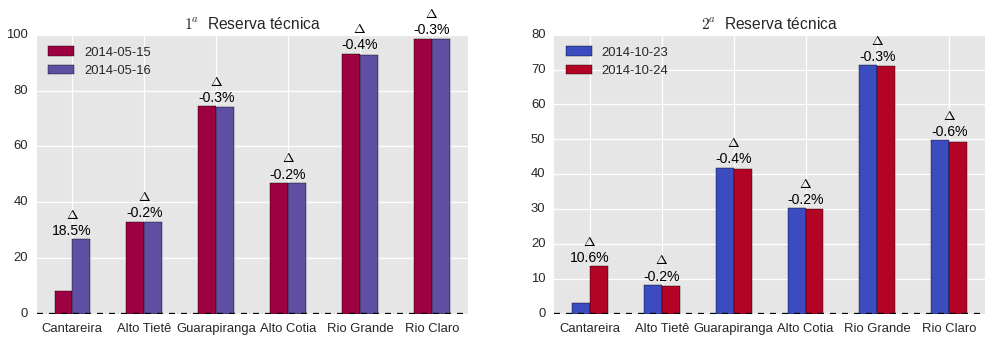

In [8]:
dados = df.ix[['2014-05-15','2014-05-16']], df.ix[['2014-10-23','2014-10-24']]
#from sabesPy import plotSideBySide
plotSideBySide(dados, titles=['$1^a$ Reserva técnica', '$2^a$ Reserva técnica'])

o cantareira tem capacidade total de quase 1 trilhão de litros, segundo a matéria do G1. 

Então, entre os dias 15 e 16 de março, *POOF*: **180 bilhões** de litros surgiram num passe de mágica!

Depois, em outubro, *POOF*. Surgem mais **100 bilhões**. 


#QUE BRUXARIA É ESSA?!?

O próprio [site](http://www2.sabesp.com.br/mananciais/DivulgacaoSiteSabesp.aspx) da sabesp esclarece:


- A **primeira reserva técnica** entrou em operação em **16/05/2014** e acrescentou mais **182,5 bilhões** de litros ao sistema - 18,5% de acréscimo;

- A **segunda reserva técnica** entrou em operação em **24/10/2014** e acrescentou mais **105,4 bilhões** de litros ao sistema - 10,7% de acréscimo 


Ou seja, o percentual divulgado pela sabesp não é corrigido para descontar o volume morto e, portanto, comparar 14 de março desse ano com o ano passado não faz sentido.

O G1 errou. Mas o quanto errou? Será que já, pelo menos, pagamos nossa "dívida" com o volume morto?

## corrigindo o percentual do cantareira


Simples assim:
$$ Vol_1 = p \times Vol_0 + Vol_{morto}$$ 

$$ p_{corrigido} = \frac{Vol_1}{Vol_0}  $$

<table>
    <tr> 
        <td>     $Vol_1$     </td>  <td> o volume atual do sistema  </td>
    </tr>  <tr> 
        <td>     $Vol_0$     </td> <td>  a capacidade máxima do reservatório (sem contar o volume morto) </td>
    </tr>  <tr>
        <td>   $Vol_{morto}$ </td> <td> advinha! </td> 
    </tr>  <tr> 
        <td>          $p$    </td> <td>  o percentual divulgado pela sabesp </td>
    </tr>  <tr> 
        <td>$p_{corrigido}$  </td> <td> o percentual corrigido</td>
</table>


essa correção foi implementada na função `fixPercent` do [sabesPy](http://github.com/varnion/sabesPy/blob/master/sabesPy.py)

In [9]:
from sabesPy import fixPercent
dFixed = df.copy()
dFixed.Cantareira = ([fixPercent(p, dia) for p, dia in zip(df.Cantareira, df.index)])

2014-03-14:  15.5 ===>  15.5  VOLUME MORTO   0.0 (bi L)
2014-05-15:   8.2 ===>   8.2  VOLUME MORTO   0.0 (bi L)
2014-05-16:  26.7 ===>   8.1  VOLUME MORTO 182.5 (bi L)
2014-07-12:  18.5 ===>  -0.1  VOLUME MORTO 182.5 (bi L)
2014-10-23:   3.0 ===> -15.6  VOLUME MORTO 182.5 (bi L)
2014-10-24:  13.6 ===> -15.7  VOLUME MORTO 287.9 (bi L)
2015-01-01:   7.2 ===> -22.1  VOLUME MORTO 287.9 (bi L)
2015-03-14:  14.5 ===> -14.8  VOLUME MORTO 287.9 (bi L)


Pronto. 
##O G1 errou.

$-14.8 \neq 14.5$

~~vai ver só confundiram o sinal~~

Vamos ver como fica aquele ultimo gráfico corrigido?

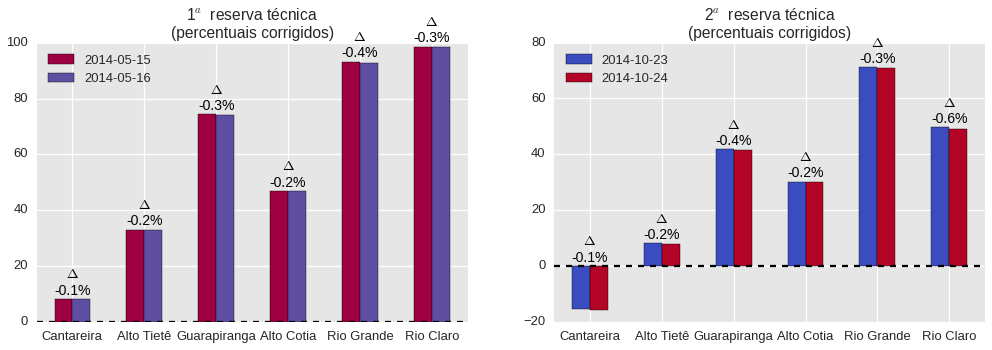

In [10]:
dados = dFixed.ix[['2014-05-15','2014-05-16']], dFixed.ix[['2014-10-23','2014-10-24']]

plotSideBySide(dados, 
    titles=['1$^a$ reserva técnica\n(percentuais corrigidos)', 
            '2$^a$ reserva técnica\n(percentuais corrigidos)'])

Pronto. Agora faz sentido, sem aquela variação absurda. 


Finalmente, comparemos o grafico com os dados usados pelo G1 e com dados corrigidos

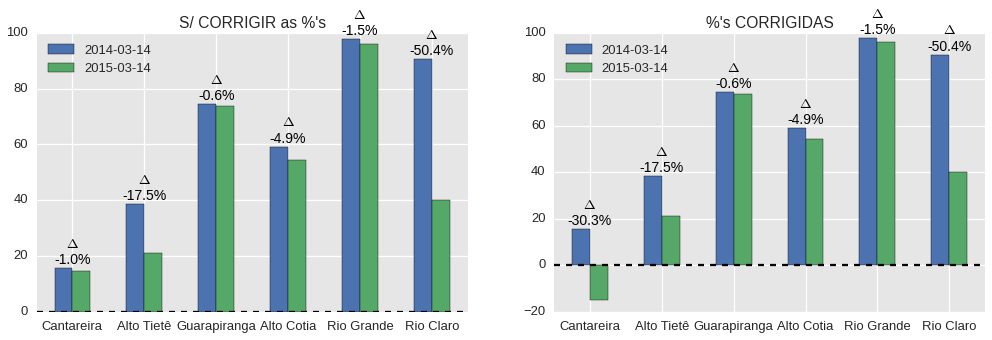

In [18]:
dados = df.ix[datasG1], dFixed.ix[datasG1]

plotSideBySide(dados,cm=[None,None],
              titles=["S/ CORRIGIR as %'s",
                     "%'s CORRIGIDAS"])

## G1 errou 30%

####errou feio, errou rude.


Estamos muito longe do nível do ano passado. (E, mesmo que estivessemos com 15% da capacidade do cantareira, ainda seria uma situação crítica)

PS: Ainda faltou corrigir o percentual pro Alto Tietê, que também incorporou um "volume morto".